# **Crash course in Statistics**

---

### **Introduction**
This notebook gives a rapid introduction to the basics of statistics.

**NOTE:** The material in this notebook should be regarded as reference material to look back to when needed. 

---

### **Author**
**Junichi Koganemaru**  

---

### **References**
1. All of Statistics: A Concise Course in Statistical Inference by Larry Wasserman.
2. Statistical Inference by George Casella and Roger L. Berger.
3. Elements of Statistical Learning by Trevor Hastie, Robert Tibshirani, and Jerome Friedman.
4. Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.


---

### **Recommended Reading and Resources**
1. [Bessel's Correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)
2. [Confidence Intervals](https://en.wikipedia.org/wiki/Confidence_interval)
3. [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)
4. [Fisher Information](https://en.wikipedia.org/wiki/Fisher_information)
5. [Delta Method](https://en.wikipedia.org/wiki/Delta_method)
6. [Cramer-Rao Lower Bound](https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93Rao_bound)
7. [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

---

### **Last Updated**
**January 26, 2025**

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import beta

## Statistical Modeling

"All models are wrong; some are useful." - George Box (1919-2023)

The goal of statistical analysis is to analyze the complex processes generating raw, observable data with a mathematically and computationally tractable model. The main objective is not to come up with a "perfect" model describing the data, but rather a sufficiently accurate representation of the data generating process to make predictions.

From a statistical standpoint, a probability model is usually *incompletely specified*, meaning that even if a particular model is assumed, there are still parameters that need to be estimated. 

To estimate these parameters, we often use a *sample* of data to estimate the parameters of the model. This is known as *statistical inference*.

## Terminology 

* **Population**: The entire set of individuals or objects of interest.
* **Sample**: A subset of the population.
* **Parameters**: Constants that distinguish probability models in the same family, e.g. the mean and variance of a normal distribution.
* **Statistic**: A *statistic* is a function of the random variables that are used to model the data. For example, the sample mean is a statistic. **A statistic is a random variable/vector**.
* **Estimator**: A statistic used to estimate a parameter. **An estimator is a random variable/vector**. 

> **Remark**: 
> In statistics, the "hat" notation is often used to denote an estimator. For example, if $\theta$ is a parameter, then $\hat{\theta}$ is an estimator of $\theta$.

> **Example**:
> Suppose we have samples $(x_1, y_1), ..., (x_n, y_n)$ and we model it via a simple linear model $y = \beta_0 + \beta_1 x + \epsilon$, where $\epsilon: \Omega \to \mathbb{R}$ is a random variable that we use to model the *irreducible error*. Then the least squares solution $\hat{\boldsymbol{\beta}} = \begin{pmatrix} \hat{\beta}_0 & \hat{\beta}_1 \end{pmatrix}^T$ given by the pseudoinverse of the design matrix is an estimator of the true parameters $\boldsymbol{\beta} = \begin{pmatrix} \beta_0 & \beta_1 \end{pmatrix}^T$. We will show via the Gauss-Markov theorem that unsurprisingly, the least squares estimator is the "best" estimator of $\beta$ is a certain sense.

Since estimators are random variables/vectors, it is sensible to talk about its expected value, variance, distribution, etc.

In practice, there are competing estimators for the same parameter. Ideally, 

* An estimator should be *accurate*, meaning that its distribution as a random variable should be centered around the true value of the parameter.
* An estimator should be *precise*, meaning that its distribution should have a small spread/low variance.

For these reasons we give the following set of definitions. 

> **Definition (Biased and unbiased estimators):** 
> An estimator $\hat{\theta}:\Omega \to \mathbb{R}^n$ is said to be *unbiased* if $\mathbb{E}[\hat{\theta}] = \theta$ for some parameter $\theta \in \mathbb{R}^n$. Otherwise, the estimator is said to be *biased*.

> **Definition (Standard error (SE) of an estimator):**
> The *standard error* of an estimator $\hat{\theta}$ is defined to be the square root of the variance of the estimator, i.e. $\text{SE}(\hat{\theta}) = \sqrt{\text{Var}(\hat{\theta})}$.

The standard error is usually attached with an estimator to give an idea of how much the estimator is expected to vary from the true value of the parameter.

> **Definition (Minimum variance unbiased estimator (MVUE)):**
> An estimator $\hat{\theta}$ is said to be a *minimum variance unbiased estimator* (MVUE) of a parameter $\theta$ if it is unbiased and has the smallest variance among all unbiased estimators of $\theta$. In other words, for any other unbiased estimator $\tilde{\theta}$ of $\theta$, we have $\text{Var}(\hat{\theta}) \leq \text{Var}(\tilde{\theta})$.

## Bias-variance tradeoff

In practice, there is often a tradeoff between bias and variance. Typically, a more complex model will have lower bias but higher variance, while a simpler model will have higher bias but lower variance. This is known as the *bias-variance tradeoff*.

This concept can be made formal by introducing the concept of the *mean squared error* (MSE) of an estimator.

> **Definition (Mean squared error (MSE) of an estimator):**
> The *mean squared error* of an estimator $\hat{\theta}$ is defined to be the expected value of the square of the difference between the estimator and the true value of the parameter, i.e. $\text{MSE}_\theta(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2]$.

> **Proposition:**
> The MSE of an estimator can be decomposed into the sum of the square of the bias and the variance of the estimator, i.e. $\text{MSE}_\theta(\hat{\theta}) = \text{Bias}(\hat{\theta})^2 + \text{Var}(\hat{\theta}),$ where $\text{Bias}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta$.

<details>

<summary> Proof: </summary>

This follows from a computation. We have
$$  
\text{MSE}_\theta(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2] = \mathbb{E}[\hat{\theta}^2 - 2\hat{\theta}\theta + \theta^2] = \mathbb{E}[\hat{\theta}^2] - 2\theta\mathbb{E}[\hat{\theta}] + \theta^2
$$
and 
$$
\text{Var}(\hat{\theta}) = \mathbb{E}[\hat{\theta}^2] - \left(\mathbb{E}[\hat{\theta}]\right)^2.
$$
Therefore 
$$ 
\text{MSE}_\theta(\hat{\theta}) - \text{Var}(\hat{\theta})  =  \left(\mathbb{E}[\hat{\theta}]\right)^2 - 2\theta\mathbb{E}[\hat{\theta}] + \theta^2  = (\mathbb{E}[\hat{\theta}] - \theta)^2 = \text{Bias}(\hat{\theta})^2.
$$

</details>

If the variance of an estimator is large and the bias is low, this typically corresponds to *overfitting* or *undersmoothing* of the data. On the other hand, if the bias of an estimator is large and the variance is low, this typically corresponds to *underfitting* or *oversmoothing*.

> **Example:**
> Suppose $X_1, ..., X_n: \Omega \to \mathbb{R}$ are random variables all with mean $\mu$ and variance $\sigma^2$. Further assume that the random variables are pairwise uncorrelated. Then the sample mean $\bar{X}: \Omega \to \mathbb{R}$ defined via $\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$ is a statistic that estimates the mean $\mu$. We note that by linearity of expectation, we have 
> $$
> \mathbb{E}[\bar{X}] = \frac{1}{n} \mathbb{E}[n \mu] = \mu,
> $$
> The variance of the sample mean is given by
> $$
> \text{Var}(\bar{X}) = \text{Var}\left(\frac{1}{n}\sum_{i=1}^n X_i\right) = \frac{1}{n^2}\sum_{i=1}^n \text{Var}(X_i) = \frac{\sigma^2}{n},
> $$
> where we used the fact that $\text{Cov}(X_i, X_j) = 0$ for all $i \neq j, 1 \le i,j \le n$. This shows that the standard error of the sample mean is $\text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}}$. As a result, the mean squared error of the sample mean is given by $\text{MSE}_\mu(\bar{X}) = \text{Var}(\bar{X}) + \underbrace{\text{Bias}(\bar{X})^2}_{= 0} = \frac{\sigma^2}{n}$.
> If in addition, we assume that $X_1, ..., X_n$ are i.i.d. (independent and identically distributed), then the central limit theorem says that for $n$ sufficiently large, the sample mean $\bar{X}$ is approximately normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$, i.e. $\bar{X} \approx \mathcal{N}(\mu, \frac{\sigma^2}{n})$.
> One can also check that the sample variance $s^2: \Omega \to \mathbb{R}$ defined via $s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2$ is an unbiased estimator of the variance $\sigma^2$ of the random variables $X_1, ..., X_n$. Here the use of the factor $\frac{1}{n-1}$ instead of $\frac{1}{n}$ is known as Bessel's correction. 

Bias-Variance is an important theme that will come up again when we discuss model complexity. The following diagram is useful to keep in mind for future discussions.

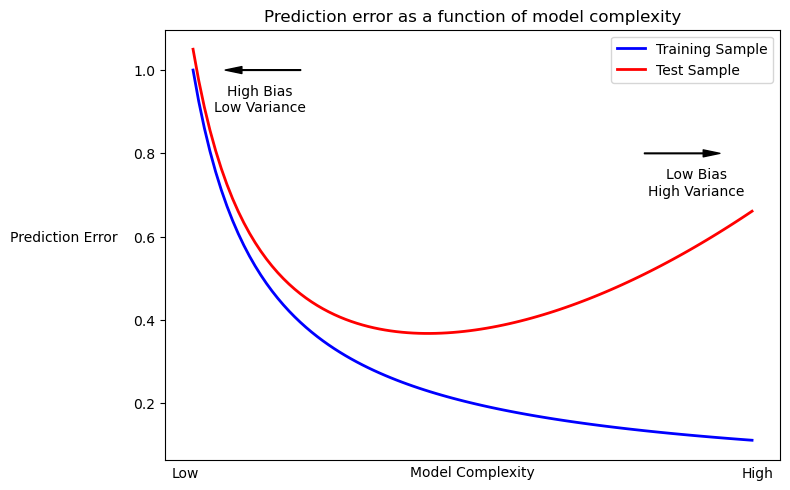

In [6]:
x = np.linspace(0, 1, 100)
train_error = 1 / (1 + 8 * x) 
test_error = 1 / (1 + 8 * x) + 0.5 * x**2 + 0.05 


plt.figure(figsize=(8, 5))
plt.plot(x, train_error, label='Training Sample', color='blue', linewidth=2)
plt.plot(x, test_error, label='Test Sample', color='red', linewidth=2)

plt.text(0.01, -0.04, 'Low', ha='left', transform=plt.gca().transAxes)
plt.text(0.99, -0.04, 'High',  ha='right', transform=plt.gca().transAxes)
plt.xlabel('Model Complexity')
plt.xticks([])
plt.ylabel('Prediction Error', rotation=0, labelpad=50)
plt.text(0.12, 0.9, 'High Bias\nLow Variance', fontsize=10, ha='center')
plt.annotate('', xy=(0.05, 1), xytext=(0.2, 1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))
plt.text(0.9, 0.7, 'Low Bias\nHigh Variance', fontsize=10, ha='center')
plt.annotate('', xy=(0.95, 0.8), xytext=(0.8, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))
plt.title('Prediction error as a function of model complexity')
plt.legend()
plt.tight_layout()
plt.show()

## Confidence intervals

The standard error of an estimator gives an idea of how much the estimator is expected to vary from the true value of the parameter. An alternative way to quantify the uncertainty of an estimator is to construct a *confidence interval*.

> **Definition (Confidence interval):**
> An interval $(a,b) \subseteq \mathbb{R}$ is called a *$100(1-\alpha)\%$ confidence interval for a parameter $\theta$* if 
> $$ \mathbb{P}(a \leq \theta \leq b) = 1 - \alpha. $$

The typical choice is $\alpha = 0.05$, which corresponds to a $95\%$ confidence interval. Other common choices are $\alpha = 0.01$ (for a $99\%$ confidence interval) and $\alpha = 0.1$ (for a $90\%$ confidence interval).

To construct confidence intervals, we typically use the *quantile function* associated to a probability distribution.

> **Definition (Quantile function):**
> Let $X: \Omega \to \mathbb{R}$ be a random variable with cumulative distribution function $F_X(x) = \mathbb{P}(X \leq x)$. The *quantile function* of $X$ is the function $Q_X: [0,1] \to \mathbb{R}$ defined via 
> $$ Q_X(p) = \inf\{x \in \mathbb{R} : F_X(x) \geq p\}.$$

Quantile functions often do not have nice closed form expressions, however they can be computed numerically. In Python, the `scipy.stats` module has functions to compute quantiles of common probability distributions. In particular, the quantile function of the standard normal distribution can be computed using the `scipy.stats.norm.ppf` function.


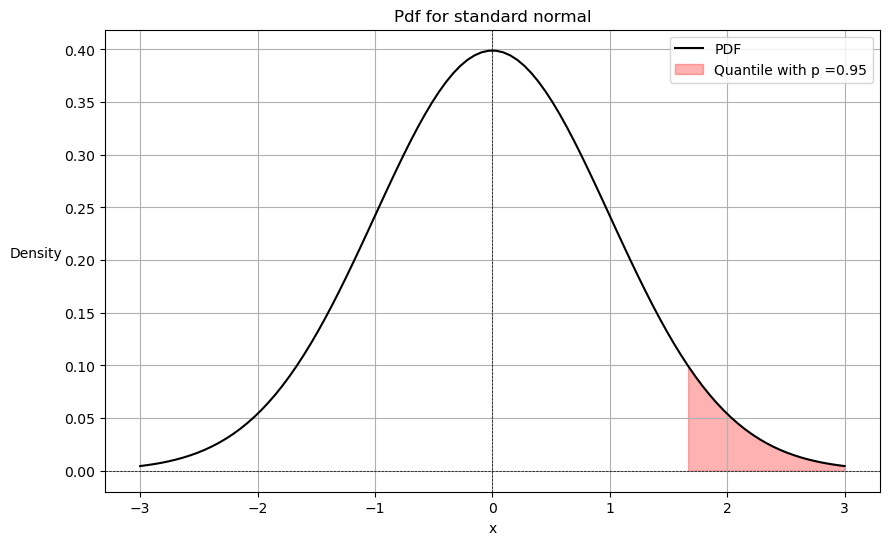

In [9]:
p_value = 0.95

x = np.linspace(-3, 3, 100)

pdf_values = norm.pdf(x)

quantile_value = norm.ppf(p_value)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='PDF', color='black')
plt.fill_between(x, pdf_values, where=(x >= quantile_value), color='red', alpha=0.3, label=f'Quantile with p =0.95')
plt.xlabel('x')
plt.ylabel('Density', rotation = 0, labelpad=20) 
plt.title('Pdf for standard normal')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


> **Example:** 
> If $X_1, ..., X_n$ are assumed to be i.i.d. and *normally distributed* with mean $\mu$ and variance $\sigma^2$, then the sample mean $\bar{X}$ is *exactly* normally distributed with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$. This means that $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ is a standard normal random variable. Therefore, 
> $$
> \mathbb{P}\left(-z_{\alpha/2} \leq \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \leq z_{\alpha/2}\right) = 1 - \alpha,
> $$
> where $z_{\alpha}$ is the point from the pdf of the standard normal distribution such that $\mathbb{P}(Z \ge z_{\alpha}) = \alpha$ where $Z \sim N(0,1)$. We note that this can be rewritten as 
> $$ 
> \mathbb{P}\left(\bar{X} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right) = 1 - \alpha.
> $$
> Therefore, the interval $\left(\bar{X} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)$ is a $100(1-\alpha)\%$ confidence interval for the mean $\mu$.
> In Python, $z_{\alpha/2}$ can be computed via `scipy.stats.norm.ppf(1 - alpha/2)`.

We note that the correct statistical interpretation of this confidence interval is that if we were to repeat an experiment sufficiently many times, $100(1-\alpha)\%$ of the time the true value of the parameter $\mu$ would lie in the interval $\left(\bar{X} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{X} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)$.

Proportion of confidence intervals containing the true mean: 0.95


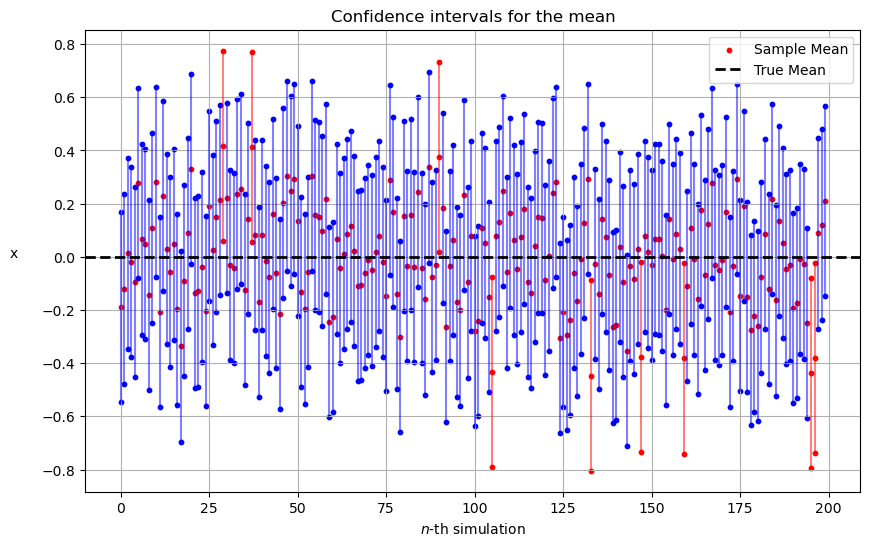

In [7]:
np.random.seed(42) 
true_mean = 0
true_std = 1
n = 30
num_simulations = 200
alpha = 0.05

count_contains_true_mean = 0
confidence_intervals = []
sample_means = []

for _ in range(num_simulations):
    samples = np.random.normal(loc=true_mean, scale=true_std, size=n)
    sample_mean = np.mean(samples)
    sample_means.append(sample_mean)
    se = true_std / np.sqrt(n)
    z_value = norm.ppf(1 - alpha / 2)
    ci_lower = sample_mean - z_value * se
    ci_upper = sample_mean + z_value * se
    confidence_intervals.append((ci_lower, ci_upper))
    
    if ci_lower <= true_mean <= ci_upper:
        count_contains_true_mean += 1

proportion = count_contains_true_mean / num_simulations
print(f"Proportion of confidence intervals containing the true mean: {proportion:.2f}")

plt.figure(figsize=(10, 6))

for i, (ci_lower, ci_upper) in enumerate(confidence_intervals):
    color = 'blue' if ci_lower <= true_mean <= ci_upper else 'red'
    plt.plot([i, i], [ci_lower, ci_upper], color=color, alpha=0.5)
    plt.scatter(i, ci_lower, color=color, s=10)
    plt.scatter(i, ci_upper, color=color, s=10)
    plt.scatter(i, sample_means[i], color='red', s=10, label='Sample Mean' if i == 0 else "")

plt.axhline(true_mean, color='black', linestyle='dashed', linewidth=2, label='True Mean')

plt.xlabel('$n$-th simulation')
plt.ylabel('x', rotation=0, labelpad=20)
plt.title('Confidence intervals for the mean')
plt.legend()
plt.grid(True)
plt.show()

## Method of Moments

Next we discuss some methods for constructing estimators. A simple method is the *method of moments*.

> **Definition (Moments of a random variable):**
> Let $X: \Omega \to \mathbb{R}$ be a random variable. The $k$-th moment of $X$ is defined to be $\mathbb{E}[X^k]$. We say that the $k$-th moment of $X$ exists if $\mathbb{E}[X^k] < \infty$.



Estimators constructed using the method of moments are called *method of moments estimators*. These estimators have the advantage of being easy to compute, but they are often biased. 

Here is an outline of how it works. Suppose $X_1, ..., X_n: \Omega \to \mathbb{R}$ are i.i.d. with density $f_X(\cdot; \boldsymbol{\theta})$, where $\boldsymbol{\theta} = \begin{pmatrix} \theta_1 & ... & \theta_k \end{pmatrix}^T$ is a vector of parameters. We define the $k$-th sample moment via $M_k = \frac{1}{n}\sum_{i=1}^n X_i^k$. The $k$-sample moment is an unbased estimator of the $k$-th moment, since $\mathbb{E}[M_k] = \mathbb{E}[X^k]$.


The method of moments proceeds by setting up $k$ equations, setting the sample moments equal to the population moments, and solving for the parameters $\hat{\boldsymbol{\theta}}_{\text{MOM}}$.
$$ 
\begin{align} 
M_1 &= \mathbb{E}[X] \\
M_2 &= \mathbb{E}[X^2] \\
&\quad \vdots \\
M_k &= \mathbb{E}[X^k].
\end{align}
$$ 
We note that the LHS of this system of equations are functions of $X_1, ..., X_n$, whereas the right hand side are functions of the parameters $\hat{\boldsymbol{\theta}}_{\text{MOM}}$. We can the moment of methods estiamtors symbolically as 
$$ 
\begin{align} 
\hat{\theta}_{1,\text{MOM}} &= g_1(X_1, ..., X_n) \\
&\quad \quad \vdots \\
\hat{\theta}_{k,\text{MOM}} &= g_k(X_1, ..., X_n)
\end{align}
$$ 
for some functions $g_1, ..., g_k$.

To read more about the method of moments, see [here](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)).

### Moment generating functions 

To compute the moments of a random variable, one can use the *moment generating function* of the random variable.

> **Definition (Moment generating function):**
> Let $X: \Omega \to \mathbb{R}$ be a random variable. The *moment generating function* of $X$ is the function $M_X: \mathbb{R} \to \mathbb{R}$ defined via
> $$ M_X(t) = \mathbb{E}[e^{tX}].$$

The moment generating function of a random variable is a powerful tool for computing moments of the random variable. In particular, the $k$-th moment of $X$ is given by the $k$-th derivative of the moment generating function evaluated at $t = 0$, i.e. $\mathbb{E}[X^k] = M_X^{(k)}(0)$.

> **Example:**
> Suppose $X: \Omega \to \mathbb{R}$ is a standard normal random variable, i.e. $X \sim \mathcal{N}(0,1)$. Then the moment generating function of $X$ is given by 
> $$
> M_X(t) = \mathbb{E}[e^{tX}] = \int_{-\infty}^\infty e^{tx} \frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{tx - x^2/2}dx = e^{t^2/2}.
> $$
> In general, if $X \sim N(\mu, \sigma^2)$, then the moment generating function of $X$ is given by $M_X(t) = e^{t\mu + \frac{1}{2}\sigma^2 t^2}$. This shows that 
> $$
> \mathbb{E}[X] = M_X'(0) = \mu, \quad \mathbb{E}[X^2] = M_X''(0) = \mu^2 + \sigma^2, \quad \mathbb{E}[X^3] = M_X'''(0) = \mu^3 + 3\mu\sigma^2.
> $$

## Maximum Likelihood Estimation (MLE)

Another method for constructing estimators is the *maximum likelihood estimation* (MLE) method. The MLE method is based on the idea of finding the parameter values that maximize the likelihood of the observed data. 

Maximum likelihood estimators (MLEs) are widely used in practice as they often have good *asymptotic* properties. For example, under certain assumptions, maximum likelihood estimators are approximately normally distributed. This means that it is fairly straightforward to calculate standard errors for MLEs and construct confidence intervals.

### Basic idea 

Suppose $X: \Omega \to \R$ is a standard normal random variable, i.e. $X \sim \mathcal{N}(0,1)$. For continuous random variables, $\mathbb{P}(X = a)$ is always 0, so density functions do not return probabilities. However, the density is higher where the probability is higher. The mathematically precise way to say this is that for small $\epsilon > 0$, if we want to find $a$ to maximize $\mathbb{P}(X \in (a-\epsilon, a+\epsilon))$, then we should choose $a$ such that the density function $f_X(a)$ is maximal.

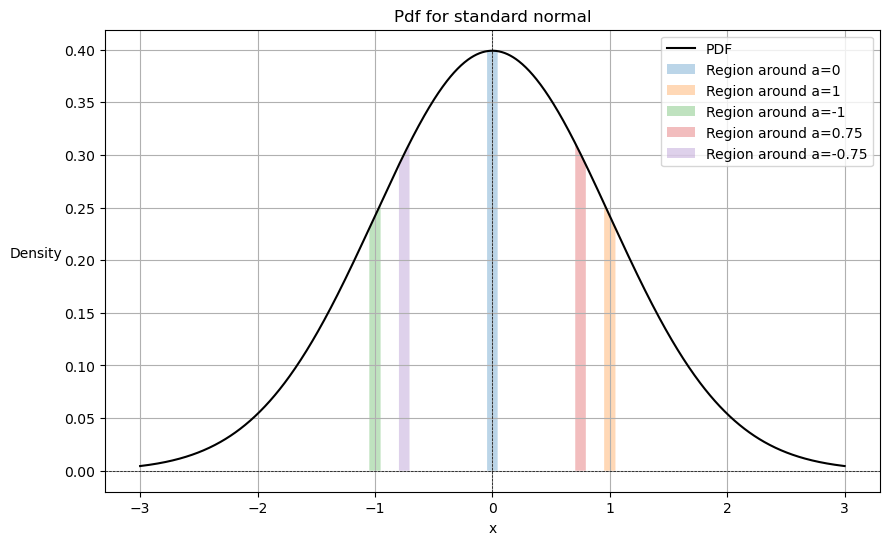

In [37]:
a_values = [0, 1, -1, 0.75, -0.75]
epsilon = 0.05

x = np.linspace(-3, 3, 1000)

pdf_values = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='PDF', color='black')
for a in a_values:
    plt.fill_between(x, pdf_values, where=((x >= a - epsilon) & (x <= a + epsilon)), alpha=0.3, label=f'Region around a={a}')

plt.xlabel('x')
plt.ylabel('Density', rotation=0, labelpad=20)
plt.title('Pdf for standard normal')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

If we assumed that some observed data is drawn from a continuous distribution, then the density function specifies where the data is most likely to be. 

Here is a toy example to illustrate the main idea behind MLEs. Suppose we observe some data $x \in \mathbb{R}$, and we assume that it is drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$. What values of $\mu$ and $\sigma^2$ make the observed data most likely?

For example, suppose we observe $x = 2$ and $\sigma^2 = 1$. Then $\hat{\mu} = 2$ would be the maximum likelihood estimator for $\mu$.

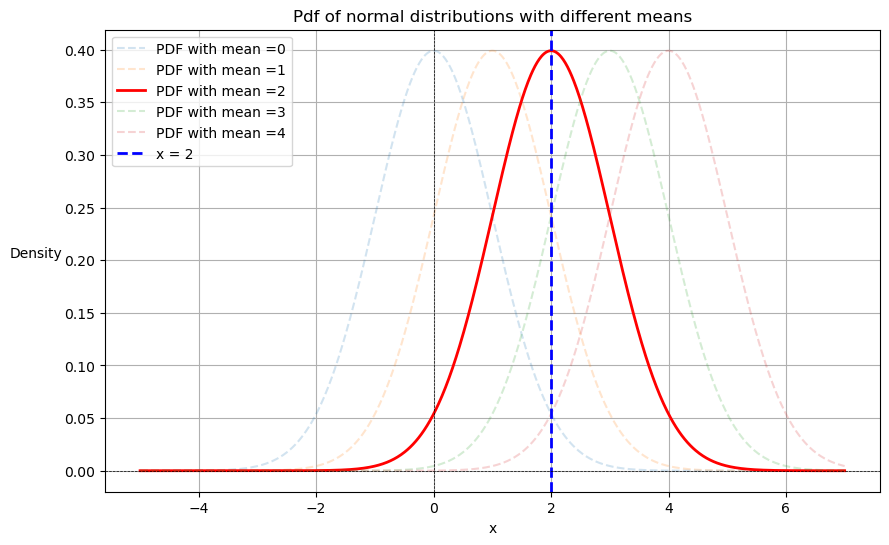

In [44]:
means = [0, 1, 2, 3, 4]
std_dev = 1

x = np.linspace(-5, 7, 1000)

plt.figure(figsize=(10, 6))

for mu in means:
    pdf_values = norm.pdf(x, loc=mu, scale=std_dev)
    if mu == 2:
        plt.plot(x, pdf_values, label=f'PDF with mean ={mu}', color='red', linewidth=2)
    else:
        plt.plot(x, pdf_values, label=f'PDF with mean ={mu}', linestyle='--', alpha=0.2)

plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='x = 2')

plt.xlabel('x')
plt.ylabel('Density', rotation=0, labelpad=20)
plt.title('Pdf of normal distributions with different means')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

This leads to the notion of a **likelihood function**, where we hold the data constant in the joint density function and think of it as a function of the parameters.

In the example above, the density function with fixed variance is 
$$
f_X(x; \mu) = \frac{1}{\sqrt{2\pi}}e^{-(x - \mu)^2/2}.
$$

If $x$ is fixed, say $x = 2$, then the *likelihood function* is the function $L: \mathbb{R} \to \mathbb{R}$ given by 
$$
L(\mu) = f_X(2; \mu) = \frac{1}{\sqrt{2\pi}}e^{-(2 - \mu)^2/2}.
$$

The maximimum likelihood estimator $\hat{\mu}$ is defined to be the value of $\mu$ that maximizes the likelihood function, i.e. $\hat{\mu} = \text{argmax}_{\mu \in \mathbb{R}} L(\mu)$. In this example, $\hat{\mu} = 2$.

### The general case

In general, data is generated via a sequence of random variables $X_1, ..., X_n: \Omega \to \mathbb{R}$. We assume that the random variables are i.i.d. and have a common density function $f_X(x; \boldsymbol{\theta})$, where $\boldsymbol{\theta} = \begin{pmatrix} \theta_1 & ... & \theta_k \end{pmatrix}^T$ is a vector of parameters. The joint pdf of the random variables is given by 
$$
\prod_{i=1}^n f_X(x_i; \boldsymbol{\theta}).
$$
The likelihood function is then defined to be the function $L: \mathbb{R}^k \to \mathbb{R}$ given by
$$
L(\boldsymbol{\theta}) = \prod_{i=1}^n f_X(x_i; \boldsymbol{\theta}).
$$

Since the likelihood function is positive at its maximum, maximizing the likelihood function is equivalent to maximizing the log-likelihood function, i.e. $\hat{\boldsymbol{\theta}} = \text{argmax}_{\boldsymbol{\theta} \in \mathbb{R}^k} \log L(\boldsymbol{\theta})$. In practice, one typically derives the MLE by analyzing the *log-likelihood function* $l: \mathbb{R}^k \to \mathbb{R}$ given by 
$$ 
l(\boldsymbol{\theta}) = \log L(\boldsymbol{\theta}) = \sum_{i=1}^n \log f_X(x_i; \boldsymbol{\theta}).
$$.
In fact, maximizing the log-likelihood function is equivalent to minimizing the negative log-likelihood function, i.e. $\hat{\boldsymbol{\theta}} = \text{argmin}_{\boldsymbol{\theta} \in \mathbb{R}^k} -l(\boldsymbol{\theta})$. Since many optimization algorithms are designed to minimize functions, this is often the preferred way to numerically compute MLEs.

To find MLEs analytically, we typically use the first derivative test from calculus: set the gradient of the log-likelihood function to zero and solve for the parameters. Under reasonable assumptions on $l$, the point where the gradient is the zero vector corresponds a maximum. 

> **Example:**
> Suppose $X_1, ..., X_n$ are i.i.d. normal random variables with mean $\mu$ and variance $\sigma^2$. The likelihood function $L: \mathbb{R}^2 \to \mathbb{R}$ is given by
> $$ 
> L(\mu, \sigma^2) = \prod_{i=1}^n f_X(x_i; \mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x_i - \mu)^2/2\sigma^2}.
> $$
> The log-likelihood function $l: \mathbb{R}^2 \to \mathbb{R}$ is then given by
> $$
> l(\mu, \sigma^2) = \sum_{i=1}^n \log f_X(x_i; \mu, \sigma^2) = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2.
> $$
> Taking the partial derivative of $l$ with respect to $\mu$ and $\sigma^2$ gives us 
> $$
> \frac{\partial l}{\partial \mu}(\mu, \sigma^2) = \frac{1}{\sigma^2}\sum_{i=1}^n (x_i - \mu), \quad \frac{\partial l}{\partial \sigma^2} (\mu, \sigma^2)= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^n (x_i - \mu)^2.
> $$
> From this we find that the MLE for $\mu$ is
> $$
> \hat{\mu}_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^n x_i = \bar{x}.
> $$
> To find the MLE for $\sigma^2$, we first replace $\mu$ with $\bar{x}$ in the expression for $\frac{\partial l}{\partial \sigma^2}$, which gives us
> $$
> \hat{\sigma}^2_{\text{MLE}} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \neq s^2,
> $$
> where $s^2$ is the Bessel-corrected sample variance. Note that in all the calculations above, we treat $x_i$ as a fixed parameter.

In the previous example we see that the MLE for the variance is a biased estimator as it is not the sample variance, however it is *asymptotically unbiased*. We will illustrate this with a simple simulation below, comparing the MLE to the Bessel-corrected sample variance.

In [53]:
true_mean = 1
true_variance = 4
true_std = np.sqrt(true_variance)

np.random.seed(42)
small_sample_size = 50
large_sample_size = 100000

small_sample = np.random.normal(loc=true_mean, scale=true_std, size=small_sample_size)
large_sample = np.random.normal(loc=true_mean, scale=true_std, size=large_sample_size)

def bessel_corrected_variance(sample):
    n = len(sample)
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) ** 2) / (n - 1)

def mle_variance(sample):
    n = len(sample)
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) ** 2) / n

small_sample_bessel_variance = bessel_corrected_variance(small_sample)
small_sample_mle_variance = mle_variance(small_sample)

large_sample_bessel_variance = bessel_corrected_variance(large_sample)
large_sample_mle_variance = mle_variance(large_sample)

def mean_squared_error(estimated_variance, true_variance):
    return (estimated_variance - true_variance) ** 2

small_sample_bessel_mse = mean_squared_error(small_sample_bessel_variance, true_variance)
small_sample_mle_mse = mean_squared_error(small_sample_mle_variance, true_variance)

large_sample_bessel_mse = mean_squared_error(large_sample_bessel_variance, true_variance)
large_sample_mle_mse = mean_squared_error(large_sample_mle_variance, true_variance)

print(f"True variance: {true_variance}")
print(f"\nSmall sample size: {small_sample_size}")
print(f"Bessel corrected variance (small sample): {small_sample_bessel_variance:.4f}")
print(f"MLE variance (small sample): {small_sample_mle_variance:.4f}")
print(f"MSE of Bessel corrected variance (small sample): {small_sample_bessel_mse:.4f}")
print(f"MSE of MLE variance (small sample): {small_sample_mle_mse:.4f}")
print(f"\nLarge sample size: {large_sample_size}")
print(f"Bessel corrected variance (large sample): {large_sample_bessel_variance:.4f}")
print(f"MLE variance (large sample): {large_sample_mle_variance:.4f}")
print(f"MSE of Bessel corrected variance (large sample): {large_sample_bessel_mse:.4f}")
print(f"MSE of MLE variance (large sample): {large_sample_mle_mse:.4f}")

True variance: 4

Small sample size: 50
Bessel corrected variance (small sample): 3.4869
MLE variance (small sample): 3.4172
MSE of Bessel corrected variance (small sample): 0.2632
MSE of MLE variance (small sample): 0.3396

Large sample size: 100000
Bessel corrected variance (large sample): 4.0076
MLE variance (large sample): 4.0076
MSE of Bessel corrected variance (large sample): 0.0001
MSE of MLE variance (large sample): 0.0001


## Properties of MLEs

### Invariance 

One of the nice properties of MLEs is that they are invariant under transformations. This means that if $\hat{\boldsymbol{\theta}}$ is the MLE of $\boldsymbol{\theta}$, then $g(\hat{\boldsymbol{\theta}})$ is the MLE of $g(\boldsymbol{\theta})$ for any reasonable function $g: \mathbb{R}^k \to \mathbb{R}^k$. This is useful as in practice one is usually interested in estimating some function of the parameters, not necessarily just the parameters themselves.

### Consistency

An estimator is said to be *consistent* if it converges in probability to the true value of the parameter as the sample size goes to infinity. In other words, an estimator $\hat{\theta}$ is consistent if for all $\epsilon > 0$, we have $\lim\limits_{n \to \infty} \mathbb{P}(|\hat{\theta} - \theta| > \epsilon) = 0$. Under certain conditions, one can show that MLEs are consistent.

### Asymptotic normality

Under certain conditions, MLEs are asymptotically normally distributed. This means that for large sample sizes, the distribution of the MLE is approximately normal. This is useful as it allows us to construct confidence intervals for the parameters.

The following proposition gives a formal statement of the asymptotic normality of MLEs.

> **Proposition:**
> Let $\hat{\theta}$ be the MLE of a statistical parameter $\theta \in \mathbb{R}$. Under certain regularity conditions, we have
> $$
> \sqrt{n}(\hat{\theta} -\theta) \xrightarrow{d} N(0, 1/I(\theta)),
> $$
> where $I: \mathbb{R} \to \mathbb{R}$ is the **Fisher information** 
> $$
> I(\theta) = \mathbb{E}\left[- \frac{\partial^2}{\partial \theta^2} \log f(X; \theta)\right].
> $$

Here $\xrightarrow{d}$ denotes convergence in distribution, meaning that the CDF of the left hand side converges to the CDF of the right hand side pointwise as the sample size goes to infinity.

Practically speaking, this means that 
* $\sqrt{n}(\hat{\theta} - \theta)$ is approximately normally distributed with mean 0 and variance $1/I(\theta)$ for sufficiently large $n$.
* $\hat{\theta}$ is approximately normally distributed with mean $\theta$ and variance $1/(n I(\theta))$ for sufficiently large $n$, i.e. $\mathbb{E}[\hat{\theta}] \approx \theta$ and $\text{Var}(\hat{\theta}) \approx 1/(n I(\theta))$ for sufficiently large $n$.
* In practice, we estimate $1/I(\theta)$ by $1/I(\hat{\theta})$. 
* The standard error of the MLE is then reported as $\text{SE}(\hat{\theta}) = \sqrt{1/(n I(\hat{\theta}))}$.

### Efficiency 

One can show that the lower bound on the variance of any unbiased estimator is $\frac{1}{n I(\theta)}$; this is referred to as the *Cramér-Rao lower bound*. 

By the discussion above, we see that the MLE achieves the Cramér-Rao lower bound asymptotically. This is usually the reason why MLEs are preferred in practice: MLEs are asmpyotically unbiased and they minimize the variance (therefore the MSE) asymptotically. Furthermore, by asymptotic normality, we can easily construct confidence intervals for the parameters.

### The Delta Method

The Delta Method is based on the following proposition.

> **Proposition:**
> Suppose $X_n$ is approximately $N(\mu, \sigma_n^2)$ and $\sigma_n^2 \to 0$ as $n \to \infty$ in a suitable sense. Then under certain conditions, $g(X_n)$ is approximately $N(g(\mu), g'(\mu)^2\sigma_n^2)$, assuming $g'(\mu) \neq 0$.

Therefore if one wants to approximate $g(\theta)$, we can use the estimator $g(\hat{\theta})$ where $\hat{\theta}$ is the MLE of $\theta$. The previous proposition says that $g(\hat{\theta})$ is approximately normally distributed with mean $g(\theta)$ and variance $\frac{g'(\theta)^2}{n I(\theta)}$. In practice, one approximates the variance with $g'(\hat{\theta})^2/n I(\hat{\theta})$ and reports the standard error as $\text{SE}(g(\hat{\theta})) = \sqrt{g'(\hat{\theta})^2/n I(\hat{\theta})}$. This allows one to construct confidence intervals for functions of the parameters.

### Multiple parameters

Next we discuss the case where we have multiple parameters. Suppose $\boldsymbol{\theta} = \begin{pmatrix} \theta_1 & ... & \theta_k \end{pmatrix}^T$ is a vector of parameters. We define the Fisher information matrix $I: \mathbb{R}^k \to \mathcal{M}_{k \times k}(\mathbb{R})$ to be the matrix with entries
$$
I_{ij}(\boldsymbol{\theta}) = \mathbb{E}\left[- \frac{\partial^2}{\partial \theta_i \partial \theta_j} \log f(X; \boldsymbol{\theta})\right], \; 1 \le i,j \le k.
$$

The following proposition gives the asymptotic normality of MLEs in the case of multiple parameters.

> **Proposition:**
> Let $\hat{\boldsymbol{\theta}}$ be the MLE of a statistical parameter $\boldsymbol{\theta} \in \mathbb{R}^k$. Under certain regularity conditions, we have 
> $$
> \sqrt{n}(\hat{\boldsymbol{\theta}} -\boldsymbol{\theta}) \xrightarrow{d} N(\boldsymbol{0}, I(\boldsymbol{\theta})^{-1}),
> $$
> where $I(\boldsymbol{\theta})$ is the Fisher information matrix.

Practically speaking, this is saying that $\boldsymbol{\hat{\theta}}$ is approximately multivariate normal with mean vector $\boldsymbol{\theta}$ and covariance matrix $I(\boldsymbol{\theta})^{-1}/n$ for sufficiently large $n$.

> **Example:**
> Suppose $X_1, ..., X_n$ are i.i.d. normal random variables with mean $\mu$ and variance $\sigma^2$. Our goal is to derive the joint distribution for the MLE of $\boldsymbol{\theta} = (\mu, \sigma^2)$. The  density function is 
> $$
> f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x - \mu)^2/2\sigma^2} \implies \log f(x;\mu,\sigma^2) = -\frac{1}{2}\log(2\pi) - \frac{1}{2}\log(\sigma^2) - \frac{(x - \mu)^2}{2\sigma^2}.
> $$
> The second partial derivatives of the density function with respect to $\mu$ and $\sigma^2$ are
> $$
> \frac{\partial^2}{\partial \mu^2} \log f(x; \mu, \sigma^2) = -\frac{1}{\sigma^2}, \quad \frac{\partial^2}{\partial (\sigma^2)^2} \log f(x; \mu, \sigma^2) = \frac{1}{2\sigma^4} - \frac{(x - \mu)^2}{2\sigma^6}, \quad \frac{\partial^2}{\partial \mu \partial \sigma^2} \log f(x; \mu, \sigma^2) = - \frac{x - \mu}{2\sigma^4}.
> $$
> Therefore the Fisher information matrix is given by
> $$
> \mathcal{M}_{2 \times 2} (\mathbb{R}) \ni I(\mu, \sigma^2) = \mathbb{E} \left[ \begin{pmatrix} \frac{1}{\sigma^2} & \frac{X - \mu}{2\sigma^4} \\ \frac{X - \mu}{2\sigma^4} & -\frac{1}{2\sigma^4} + \frac{(X - \mu)^2}{\sigma^6} \end{pmatrix} \right] =  \begin{pmatrix} \frac{1}{\sigma^2} & 0 \\ 0 & \frac{1}{2 \sigma^4} \end{pmatrix}.
> $$
> The MLE for $\boldsymbol{\theta}$ is givne by 
> $$
> \hat{\boldsymbol{\theta}}_{\text{MLE}} = \begin{pmatrix} \bar{X} \\  \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2 \end{pmatrix}
> $$
> From the previous proposition, we have that the MLE is approximately bivariate normal with covariance matrix 
> $$
> \frac{I^{-1}(\boldsymbol{\theta})}{n} = \begin{pmatrix} \frac{\sigma^2}{n} & 0 \\ 0 & \frac{2\sigma^4}{n} \end{pmatrix}.
> $$
> In practice, one estimates the covariance matrix with $\Sigma = I(\hat{\boldsymbol{\theta}}_{\text{MLE}})^{-1}/n$, i.e.
> $$
> \Sigma = \begin{pmatrix} \frac{\hat{\sigma}^2}{n} & 0 \\ 0 & \frac{2\hat{\sigma}^4}{n} \end{pmatrix}.
> $$
> Therefore the standard error for $\hat{\sigma}^2$ is given by $\text{SE}(\hat{\sigma}^2) = \sqrt{2\hat{\sigma}^4/n}$.

### Multivariate Delta method 

Here is a version of the Delta method in the multivariate setting. 

Suppose $\boldsymbol{Y}_n: \Omega \to \mathbb{R}^N$ is approximately $N(\boldsymbol{\mu}, \Sigma/n)$ for sufficiently large $n$ and consider a function $g: \mathbb{R}^N \to \mathbb{R}^m$. Consider the *Jacobian matrix* of $g$
$$
\mathcal{M}_{N \times N} (\mathbb{R}) \ni G = \begin{pmatrix} \frac{\partial g_1}{\partial y_1} & ... & \frac{\partial g_1}{\partial y_N} \\ \vdots & \ddots & \vdots \\ \frac{\partial g_m}{\partial y_1} & ... & \frac{\partial g_m}{\partial y_N} \end{pmatrix}
$$
evaluated at $\boldsymbol{\mu}$. If $G$ is of full rank and certain regularity conditons are met, then $g(\boldsymbol{Y}_n)$ is approximately  $N(g(\boldsymbol{\mu}), G \Sigma G^T/n)$ for sufficiently large $n$.


We will utilize the properties of MLEs extensively, especially in the context of linear regression.

## Maximum A Posteriori (MAP) estimation 


### Bayesian inference 

Probability theory has two main interpretations: the *frequentist interpretation* and the *Bayesian interpretation*. 

In the frequentist/classical interpretation,

1. Probabilities refer to limiting frequencies of events, and are objective properties of the world.
2. Parameters are fixed but unknown quantities. Because they are non-radnom, they do not have probability distributions.
3. Statistical procedures are evaluated based on their long-run frequency properties. For example, a 95% confidence interval is one that contains the true parameter value in 95% at least of the experiments.

The alternative to the frequentist interpretation is the Bayesian interpretation. In the Bayesian framework,

1. Probabilities are used to quantify *degrees of belief,* not limiting frequencies. For example, if one says that "the probability that it will rain in New York tomorrow is 0.7," this is a statement about the speaker's belief that the proposition is true, not necessarily a statement about the limiting frequency of the event.

2. Parameters are treated as random variables. This means that we can assign a probability distribution to the parameters. In particular, we can define the *prior distribution* of the parameters, which reflects our beliefs about the parameters before observing the data, and also the *posterior distribution*, which reflects our updated beliefs after observing the data.


### Bayes' theorem

We first recall the discrete and the continuous versions of Bayes' theorem. In the discrete case, if $B_1, ..., B_n$ form a partition of the sample space $\Omega$, then for any event $A$, we have
$$
\mathbb{P}(B_i | A) =\frac{\mathbb{P}(A | B_i)\mathbb{P}(B_i)}{\mathbb{P}(A)} =  \frac{\mathbb{P}(A | B_i)\mathbb{P}(B_i)}{\sum_{j=1}^n \mathbb{P}(A | B_j)\mathbb{P}(B_j)}.
$$

The continuous analogue of Bayes; theorem is encoded in terms of conditional densities. If $X,Y: \Omega \to \mathbb{R}$ are continuous random variables, we define the conditional density of $X$ given $Y$ to be the function $f_{X|Y}: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ via
$$
f_{X|Y}(x|y) = \begin{cases} 
\frac{f_{Y|X}(y|x)f_X(x)}{f_Y(y)} = \frac{f_{Y|X}(y|x)f_X(x)}{\int_{\mathbb{R}} f_{Y|X}(y|x)f_X(x)dx}, & f_Y(y) > 0 \\
0, & f_Y(y) = 0.
\end{cases}
$$
This can also be extended to the case where $X,Y$ are random vectors: if $\boldsymbol{X}, \boldsymbol{Y}: \Omega \to \mathbb{R}^n$ are random vectors, then the conditional density of $\boldsymbol{X}$ given $\boldsymbol{Y}$ is the function $f_{\boldsymbol{X}|\boldsymbol{Y}}: \mathbb{R}^n \times \mathbb{R}^n \to \mathbb{R}$ defined via
$$
f_{\boldsymbol{X}|\boldsymbol{Y}}(\boldsymbol{x}|\boldsymbol{y}) =\begin{cases} 
 \frac{f_{\boldsymbol{Y}|\boldsymbol{X}}(\boldsymbol{y}|\boldsymbol{x})f_{\boldsymbol{X}}(\boldsymbol{x})}{f_{\boldsymbol{Y}}(\boldsymbol{y})} = \frac{f_{\boldsymbol{Y}|\boldsymbol{X}}(\boldsymbol{y}|\boldsymbol{x})f_{\boldsymbol{X}}(\boldsymbol{x})}{\int_{\mathbb{R}^n} f_{\boldsymbol{Y}|\boldsymbol{X}}(\boldsymbol{y}|\boldsymbol{x})f_{\boldsymbol{X}}(\boldsymbol{x})dx} , & f_{\boldsymbol{Y}}(\boldsymbol{y}) > 0 \\
0, & f_{\boldsymbol{Y}}(\boldsymbol{y}) = 0.
\end{cases}
$$


In the context of parameter estimation, we are interested in estimating the parameters of a model given some observed data. In the Bayesian framework, we treat the parameters as random variables and assign a prior distribution to the parameters. The goal is then to compute the *posterior distribution* of the parameters given the observed data. In this framework, we replace $Y$ with the letter $\Theta$ to denote the parameters of the model and use $\boldsymbol{X}$ to model the data. Bayes' theorem then can be written as 
$$
f_{\boldsymbol{\Theta}|\boldsymbol{X}}(\boldsymbol{\theta}|\boldsymbol{x} ) = \frac{f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta})}{f_{\boldsymbol{X}}(\boldsymbol{x})} = \frac{f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta})}{\int_{\mathbb{R}^n} f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta})d\boldsymbol{\theta}}, \quad \text{if} \; f_{\boldsymbol{X}}(\boldsymbol{x}) > 0.
$$
The interpretation here is 
1. $\boldsymbol{x} \in \mathbb{R}^n$ is the vector of observed data
2. The density $f_{\boldsymbol{\Theta}}$ is the *prior distribution* of the parameters
3. The conditional density $f_{\boldsymbol{\Theta}|\boldsymbol{X}}$ is the *posterior distribution* of the parameters given the observed data
4. The denominator is the marginal density of the data, which is a normalizing constant that ensures that the posterior distribution integrates to 1. It can also be understood as the true probability model of the data, which is why it is often called the *evidence*.

Using this interpretation, one can rewrite Bayes' theorem as
$$
\text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}.
$$

In the Bayesian framework, the prior reflects someone's opinion regarding the value of the parameters **before** observing the data. The posterior reflects the updated opinion **after** observing the data.

In Maximum A Posteriori (MAP) estimation, the goal is to find the value of the parameters that maximizes the posterior distribution. In other words, the MAP estimator is defined to be
$$
\hat{\boldsymbol{\theta}}_{\text{MAP}} = \text{argmax}_{\boldsymbol{\theta} \in \mathbb{R}^k} f_{\boldsymbol{\Theta}|\boldsymbol{X}}(\boldsymbol{\theta}|\boldsymbol{x}) = \text{argmax}_{\boldsymbol{\theta} \in \mathbb{R}^k} \frac{f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta})}{\int f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta})d\boldsymbol{\theta}}.
$$
We note that the denominator is a normalizing constant that ensures that the posterior distribution integrates to 1, and it does not depend on the parameter $\boldsymbol{\theta}$.  In practice, this term is often difficult to compute, so equivalently one can maximize the numerator instead. Therefore the MAP estimator is usually defined via
$$
\hat{\boldsymbol{\theta}}_{\text{MAP}} = \text{argmax}_{\boldsymbol{\theta} \in \mathbb{R}^k} f_{\boldsymbol{X}|\boldsymbol{\Theta}}(\boldsymbol{x}|\boldsymbol{\theta})f_{\boldsymbol{\Theta}}(\boldsymbol{\theta}).
$$

We also note that $f_{\boldsymbol{X}|\boldsymbol{\Theta}}$ is the same likehood function that we used in the MLE framework. We switched notation here, writing $f_{\boldsymbol{X}|\boldsymbol{\Theta}} (\boldsymbol{x}|\boldsymbol{\theta})$ instead of $L(\boldsymbol{\theta}) = f(\boldsymbol{x}; \boldsymbol{\theta})$, to emphasize that we are treating the parameters as random variables in this framework. 

From this point of view, the difference between MLE and MAP is that

1. In MLE, you want to find parameters that make the data the most likely, i.e. maximize the likelihood function
2. In MAP, you want to find the most likely parameters given the data, i.e. maximize the posterior distribution. The catch is that you need to build your prior beliefs of the parameters into the model.


> **Example:**
>
> Suppose $X_1, ..., X_n \sim \text{Bernoulli}(\theta)$ are i.i.d. random variables that model observable. If we assume that $\theta \sim \text{Beta}(\alpha, \beta)$, then one can show that the posterior distribution of $\theta$ given the data is given $\text{Beta}(\alpha + \sum_{i=1}^n x_i, \beta + n - \sum_{i=1}^n x_i)$, where $x_1, ..., x_n$ are the observed data. Since both the prior and posterior distributions are from the same family under the assumption that the data is Bernoulli, one refers to the Beta distribution as a *conjugate prior* to sampling from Bernoulli likelihood. 

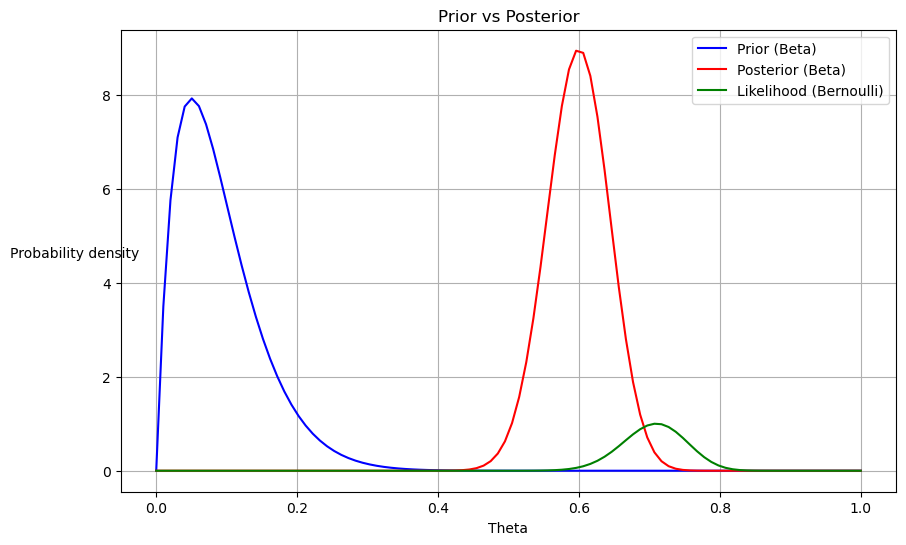

In [11]:
p_true = 0.7
n_samples = 100

data = bernoulli.rvs(p_true, size=n_samples)

prior_alpha = 2
prior_beta = 20

posterior_alpha = prior_alpha + data.sum()
posterior_beta = prior_beta + n_samples - data.sum()

theta = np.linspace(0, 1, 100)

prior = beta.pdf(theta, prior_alpha, prior_beta)
likelihood = theta**data.sum() * (1 - theta)**(n_samples - data.sum())
posterior = beta.pdf(theta, posterior_alpha, posterior_beta)

plt.figure(figsize=(10, 6))
plt.plot(theta, prior, label='Prior (Beta)', color='blue')
plt.plot(theta, posterior, label='Posterior (Beta)', color='red')
plt.plot(theta, likelihood / likelihood.max(), label='Likelihood (Bernoulli)', color='green')
plt.xlabel('Theta')
plt.ylabel('Probability density', rotation=0, labelpad=20)
plt.title('Prior vs Posterior')
plt.legend()
plt.grid(True)
plt.show()

## Hypothesis Testing

Statistical hypothesis testing is a framework for determining whether observed data supports a given well-defined hypothesis. In particular, one often uses *p-values* to quantify the strength of the evidence against the null hypothesis. The use of hypothesis testing is ubiquitous, however it can be misused and misinterpreted. See [this article](https://en.wikipedia.org/wiki/Misuse_of_p-values) of misuses of $p$-values as an example. 

### Null and Alternative Hypothesis 

Consider the following questions.

1. Given observed data from 2023 and 2024, are the slopes of the regression lines the same in both years? 
2. Given observed data, is the data normally distributed?
3. Given observed data, is the volatility constant over a given time period?
4. Given observed data, is the mean of the data equal to a given value?

In each of these cases, the question is about a feature of the population from which the sample (observed data) is drawn. Each question has a relatively simple *null hypothesis*, and the question is whetehr or not the data provides sufficient evidence to reject the null hypothesis in favor of an *alternative hypothesis*.

For example, for the first question, the associated null and alternative hypothesis are 

* Null hypothesis (usually denoted as $H_0$): The slopes of the regression lines are the same in both years.
* Alternative hypothesis (usually denoted as $H_1$): The slopes of the regression lines are different in both years.

The null hypothesis can be seen as the "baseline" hypothesis that we are testing against. The alternative hypothesis is the hypothesis that we are trying to provide evidence for. An important point about statistical hypothesis testing is that these tests are designed to determine whether there is strong evidence to support the alternative hypothesis and reject the null. They are not designed to test whether there is strong evidence to support the null hypothesis. 

### Test statistic and rejection region 

To formalize this concept, we start with a parameter space $\Theta \subseteq \mathbb{R}$, a null hypothesis $H_0: \theta \in \Theta_0$ and an alternative hypothesis $H_1: \theta \in \Theta_1$, where $\Theta_0 \cap \Theta_1 = \emptyset$. 

Let $X : \Omega \to \mathbb{R}$ be a random variable, and let $\mathcal{X}$ denote the range of $X$. We test a hypothesis by finding an apporpriate set of outcomes $R \subset \mathcal{X}$ called the *rejection region*. If the observed data falls in the rejection region, then we reject the null hypothesis in favor of the alternative hypothesis. Otherwise, we do not reject the null hypothesis. Usually, the rejection region is of the form 
$$
R = \{x \in \mathcal{X} : T(x) > c\},
$$
where $T: \mathcal{X} \to \mathbb{R}$ is a function of the data called the *test statistic* and $c \in \mathbb{R}$ is a *critical value*. Designing a hypothesis test involves choosing an appropriate test statistic $T$ and critical value $c$. We note that since the test statistic is a function of $X$, it is also a random variable. 

### Type I and Type II errors

There are two main types of errors that can occur in hypothesis testing: *Type I errors* and *Type II errors*.

1. A *Type I error* occurs when we reject the null hypothesis when it is actually true. 
2. A *Type II error* occurs when we do not reject the null hypothesis when it is actually false.

Here is a table that summarizes the possible outcomes of a hypothesis test.

<div style="display: flex; justify-content: center;">

| Decision | Null is true | Alternative is true |
| --- | --- | --- |
| Retain Null | Correct decision | Type II error |
| Reject Null | Type I error | Correct decision |

</div>

In hypothesis testing, one is primarily concerned with minimizing the probability of making a Type I error. The rejection region is then usually formed by choosing the critical value $c$ such that the probability of making a Type I error is less than a specified level $\alpha$, called the *significance level*. The significance level is usually set to 0.05 or 0.01. 

> **Example:**
> Suppose $X_1, ..., X_n: \Omega \to \mathbb{R}$ are i.i.d. $N(\mu, \sigma^2)$ random variables, where $\sigma^2$ is known. Suppose the question we want to ask is: is there strong evidence that $\mu > \mu_0$, where $\mu_0$ is given? We can design a hypothesis test by setting the null hypothesis $H_0: \mu = \mu_0$ against the alternative hypothesis $H_1: \mu > \mu_0$. A natural test statistic is the sample mean $T = \bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$.
> Fix a significance level $\alpha$. We want to choose a critical value $c$ such that the probability of making a Type I error is less than $\alpha$. This can be written as 
> $$
> \mathbb{P}(T > c | \mu = \mu_0) \le \alpha.
> $$
> In this case, the distribution of the test statistic is $N(\mu, \sigma^2/n)$, therefore $c$ is chosen so that
> $$
> \mathbb{P} \left( \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} > \frac{c - \mu}{\sigma/\sqrt{n}} \Bigg| \mu = \mu_0 \right) \le \alpha
> $$
> Since $\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ is a standard normal, this means that we must have $\frac{c - \mu_0}{\sigma/\sqrt{n}} \ge z_\alpha$, where $z_\alpha$ is the $1 - \alpha$ quantile of the standard normal distribution. Therefore we can choose $c = \mu_0 + z_\alpha \frac{\sigma}{\sqrt{n}}$.

In the example above, the alternative hypothesis is a *one-sided alternative*. We can also formulate *two-sided alternatives*, where the null hypothesis is $H_0: \theta = \theta_0$ and the alternative hypothesis is $H_1: \theta \neq \theta_0$.

> **Example:**
> Using the same example above, suppose the question we want to ask is: is there strong evidence that $\mu \neq \mu_0$, where $\mu_0$ is given? In this case the alternative hypothesis is $H_1: \mu \neq \mu_0$. The test statistic is the same as before, $T = \bar{X}$. In this case, we want to reject the null if $T$ is significantly smaller or larger than $\mu_0$. Under the null hypothesis, the distribution of the test statistic is $N(\mu_0, \sigma^2/n)$, there we can choose the critical values $c_1$ and $c_2$ such that
> $$
> \mathbb{P}(T < c_1 | \mu = \mu_0) \le \frac{\alpha}{2}, \quad \mathbb{P}(T > c_2 | \mu = \mu_0) \le \frac{\alpha}{2}.
> $$
> Following the same derivation as above, we can choose $c_1 = \mu_0 - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$ and $c_2 = \mu_0 + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$.


### $p$-values
We note that the conclusions from a hypothesis test depends on the choice of the significance level $\alpha$. If $\alpha$ is small, then the test is more conservative and it is less likely to reject the null hypothesis. If $\alpha$ is large, then the test is less conservative and it is more likely to reject the null hypothesis. The $p$-value is defined to be the smallest $\alpha$ for which we would reject the null hypothesis, which can be interpreted as the strength of the evidence against the null hypothesis. By definition, 

* If $\alpha < p$, then we retain the null hypothesis
* If $\alpha \ge p$, then we reject the null hypothesis

Two things to note.

1. The $p$-value depends on observed data, and it is not a property of the null hypothesis.
2. The $p$-value is not the probability that the null hypothesis is true or false. It is the largest possible significance level for which one fails to reject the null hypothesis.
3. An alternative interpretation of the $p$-value is that it is the probability that, assuming the null hypothesis is true, the test statistic is equal to or more extremely in favor of the alternative hypothesis than the observed data.

In practice, the following scale is used to interpret $p$-values.

* $p < 0.01$: Very strong evidence against the null hypothesis
* $0.01 \le p < 0.05$: Strong evidence against the null hypothesis
* $0.05 \le p < 0.1$: Weak evidence against the null hypothesis
* $p \ge 0.1$: Not enough evidence to reject the null hypothesis